In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
import sklearn
print(sklearn.__version__)


1.6.1


In [42]:
df = pd.read_csv("../Dataset/Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

FEATURE SELECTION


In [47]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [49]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [51]:
X = df.drop(['FWI'],axis=1)
y = df['FWI']

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [55]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

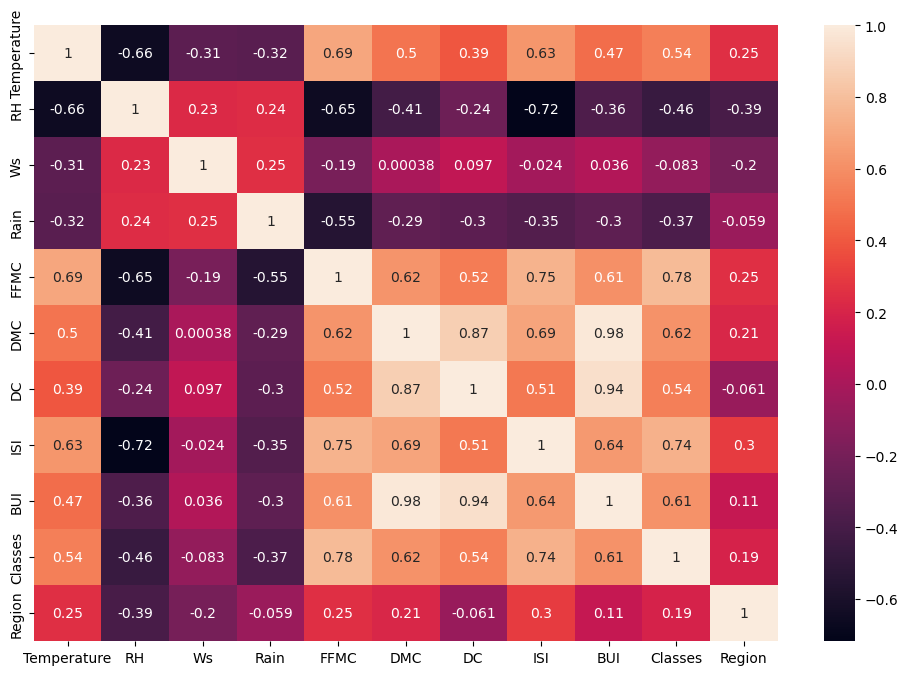

In [57]:
## check for multi collinearity
plt.figure(figsize=(12,8))
corr = X_train.corr()
sns.heatmap(X_train.corr(),annot=True)

In [58]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.80)
print(corr_features)

{'DC', 'BUI'}


In [61]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_test.shape,X_train.shape

((61, 9), (182, 9))

In [63]:
## standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

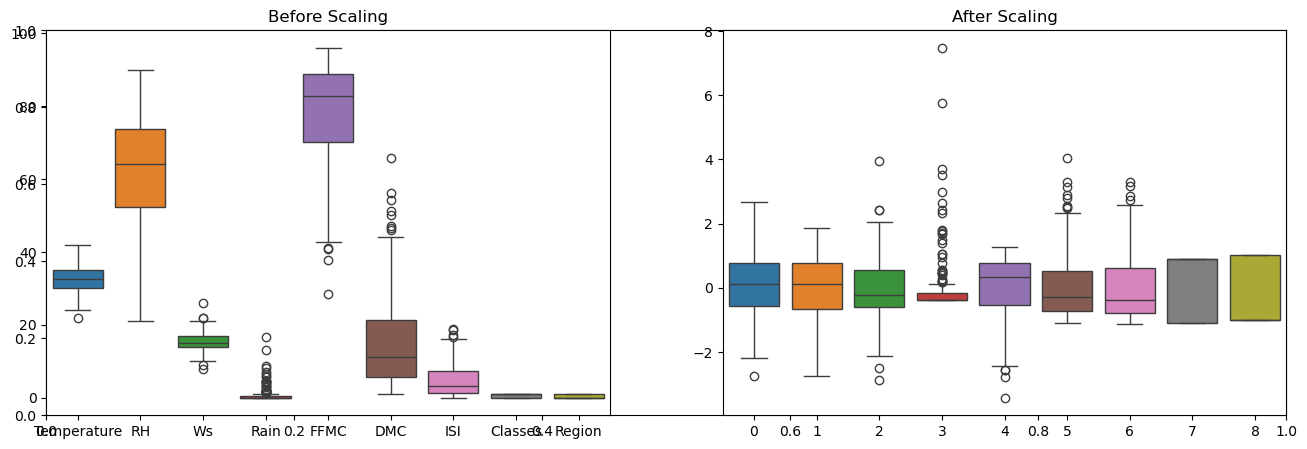

In [65]:
plt.subplots(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("After Scaling")
plt.show()

MODEL

Mean Squared Error  0.6742766873791581
Root Mean Squared Error  0.8211435242265253
Mean Absolute Error  0.5468236465249976
R2 Score  0.9847657384266951
Adjusted R2 Score  0.9820773393255237


Text(0, 0.5, 'Predicted')

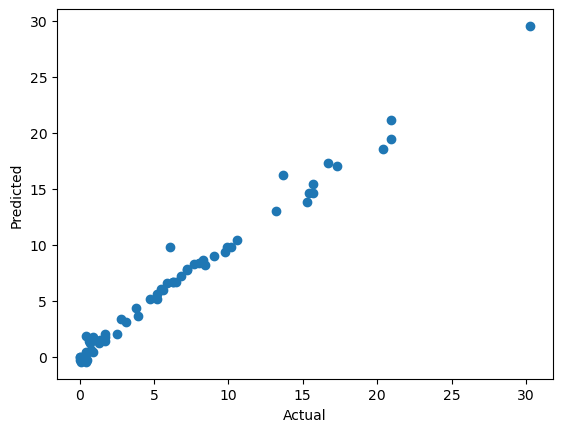

In [68]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print("Mean Squared Error ",mse)
print("Root Mean Squared Error ",rmse)
print("Mean Absolute Error ",mae)
print("R2 Score ",r2)
print("Adjusted R2 Score ",ad_r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

Mean Squared Error  2.2483458918974746
Root Mean Squared Error  1.4994485292591655
Mean Absolute Error  1.1331759949144085
R2 Score  0.9492020263112388
Adjusted R2 Score  0.9402376780132222


Text(0, 0.5, 'Predicted')

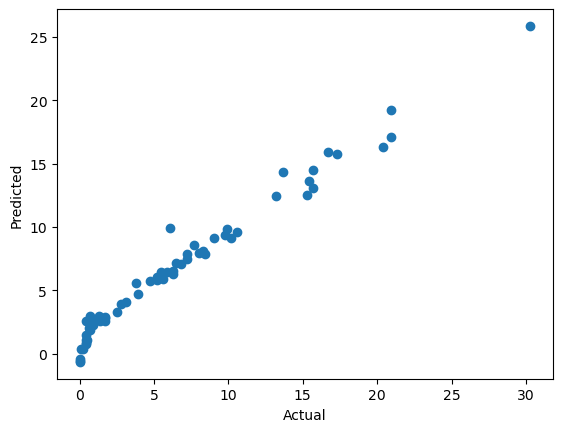

In [70]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print("Mean Squared Error ",mse)
print("Root Mean Squared Error ",rmse)
print("Mean Absolute Error ",mae)
print("R2 Score ",r2)
print("Adjusted R2 Score ",ad_r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

Mean Squared Error  0.6949198918152067
Root Mean Squared Error  0.8336185529456543
Mean Absolute Error  0.5642305340105693
R2 Score  0.9842993364555513
Adjusted R2 Score  0.9815286311241781


Text(0, 0.5, 'Predicted')

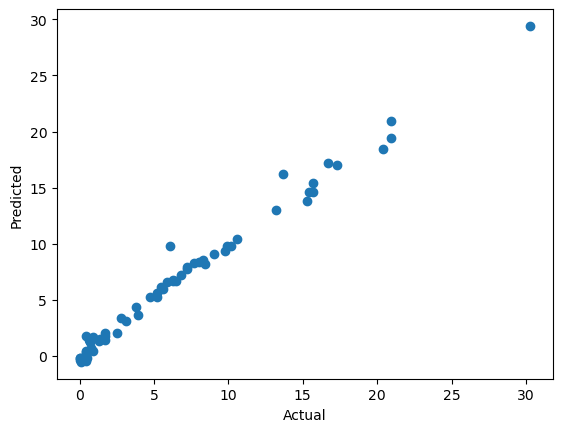

In [72]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print("Mean Squared Error ",mse)
print("Root Mean Squared Error ",rmse)
print("Mean Absolute Error ",mae)
print("R2 Score ",r2)
print("Adjusted R2 Score ",ad_r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

Mean Squared Error  5.517251101025224
Root Mean Squared Error  2.3488829474933874
Mean Absolute Error  1.8822353634896
R2 Score  0.8753460589519703
Adjusted R2 Score  0.8533483046493768


Text(0, 0.5, 'Predicted')

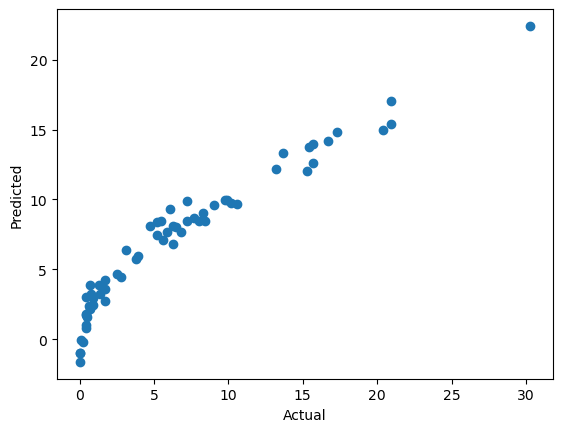

In [74]:
## Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
En = ElasticNet()
En.fit(X_train_scaled,y_train)
y_pred = En.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print("Mean Squared Error ",mse)
print("Root Mean Squared Error ",rmse)
print("Mean Absolute Error ",mae)
print("R2 Score ",r2)
print("Adjusted R2 Score ",ad_r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [76]:
def calculate_model_metrics(model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    ad_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2_score': r2, 'Adjusted R2': ad_r2}


def evaluate_all_models(X_train_scaled, y_train, X_test_scaled, y_test):
    lr = LinearRegression()
    lasso = Lasso()
    ridge = Ridge()
    elasticnet = ElasticNet()

    models = {
        'linear': lr,
        'lasso': lasso,
        'ridge': ridge,
        'elasticnet': elasticnet
    }

    model_results = pd.DataFrame(columns=['metric'] + list(models.keys()))
    model_results['metric'] = ['MAE', 'MSE', 'RMSE', 'R2_score', 'Adjusted R2']

    for model_name, model in models.items():
        metrics = calculate_model_metrics(model, X_train_scaled, y_train, X_test_scaled, y_test)
        model_results[model_name] = [metrics[metric] for metric in model_results['metric']]

    return model_results

model_df = evaluate_all_models(X_train_scaled, y_train, X_test_scaled, y_test)
model_df

,metric,linear,lasso,ridge,elasticnet
0,MAE,0.546824,1.133176,0.564231,1.882235
1,MSE,0.674277,2.248346,0.694920,5.517251
2,RMSE,0.821144,1.499449,0.833619,2.348883
3,R2_score,0.984766,0.949202,0.984299,0.875346
4,Adjusted R2,0.982077,0.940238,0.981529,0.853348


CROSS VALIDATION 

Mean Squared Error  0.7924995554743622
Root Mean Squared Error  0.8902244410677356
Mean Absolute Error  0.6199701158263431
R2 Score  0.9820946715928275
Adjusted R2 Score  0.9789349077562677


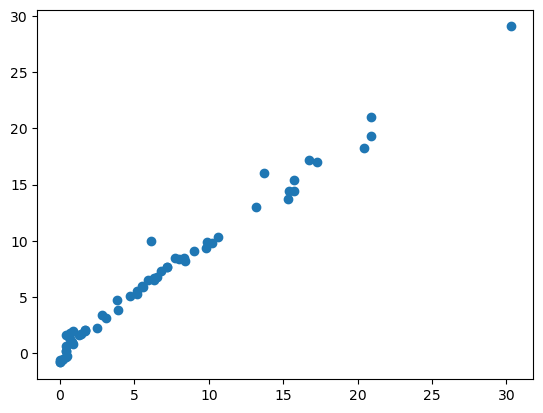

In [79]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5,random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
y_pred = lasso_cv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print("Mean Squared Error ",mse)
print("Root Mean Squared Error ",rmse)
print("Mean Absolute Error ",mae)
print("R2 Score ",r2)
print("Adjusted R2 Score ",ad_r2)

Mean Squared Error  0.6949198918152067
Root Mean Squared Error  0.8336185529456543
Mean Absolute Error  0.5642305340105693
R2 Score  0.9842993364555513
Adjusted R2 Score  0.9815286311241781


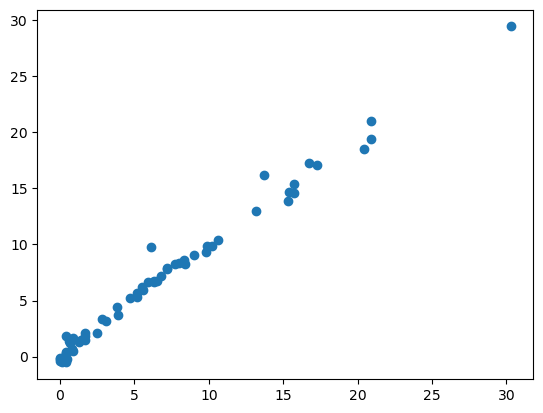

In [81]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled,y_train)
y_pred=ridge_cv.predict(X_test_scaled) 
plt.scatter(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print("Mean Squared Error ",mse)
print("Root Mean Squared Error ",rmse)
print("Mean Absolute Error ",mae)
print("R2 Score ",r2)
print("Adjusted R2 Score ",ad_r2)

Mean Squared Error  0.8222830416276272
Root Mean Squared Error  0.9067982364493368
Mean Absolute Error  0.6575946731430904
R2 Score  0.9814217587854941
Adjusted R2 Score  0.978143245629993


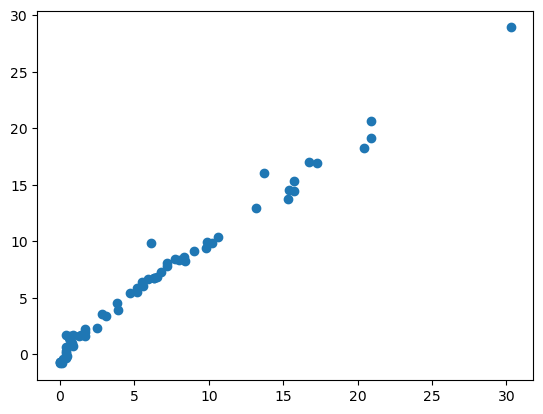

In [92]:
from sklearn.linear_model import ElasticNetCV
E_cv = ElasticNetCV(cv=5)
E_cv.fit(X_train_scaled,y_train)
y_pred=E_cv.predict(X_test_scaled) 
plt.scatter(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print("Mean Squared Error ",mse)
print("Root Mean Squared Error ",rmse)
print("Mean Absolute Error ",mae)
print("R2 Score ",r2)
print("Adjusted R2 Score ",ad_r2)

In [104]:
import pickle 
pickle.dump(scaler,open("Scaler.pkl","wb"))
pickle.dump(lr,open("model.pkl","wb"))